In [1]:
!pip install mlxtend
!pip install tqdm

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Rescaling, Normalization
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import random
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from keras import utils

train_ds = pd.read_csv("D:\D\PICT\LP5_Codes\Datasets\\fashion_mnist\\fashion-mnist_train.csv")
train_ds.dropna(inplace=True)
train_y = train_ds["label"].values
train_x = train_ds.drop("label",axis=1).values
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
train_y = utils.to_categorical(train_y)

test_ds = pd.read_csv("D:\D\PICT\LP5_Codes\Datasets\\fashion_mnist\\fashion-mnist_test.csv")
test_ds.dropna(inplace=True)
test_y = test_ds["label"].values
test_x = test_ds.drop("label",axis=1).values
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
test_y = utils.to_categorical(test_y)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [5]:
train_norm = train_x.astype('float32')
test_norm = test_x.astype('float32')

train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

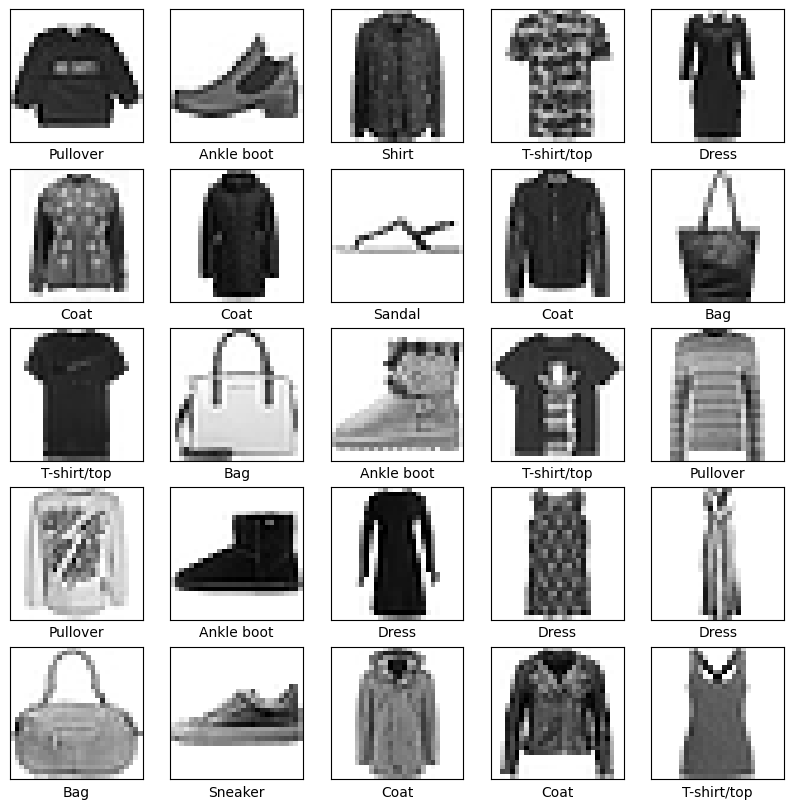

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(train_y[i])])
plt.show() 

In [7]:
from keras import Sequential
from keras import layers

model = Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', name='conv-layer-1'),
    layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-1'),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv-layer-2'),
    layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-2'),
    layers.GlobalAveragePooling2D(name='pooling-layer-3'),
    layers.Dense(len(class_names), activation="softmax", name="output-layer")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv-layer-1 (Conv2D)           │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-1                 │ (None, 14, 14, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv-layer-2 (Conv2D)           │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-2                 │ (None, 7, 7, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-3                 │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,434 (75.91 KB)

 Trainable params: 19,434 (75.91 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [9]:
history = model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6050 - loss: 1.3601 - val_accuracy: 0.8140 - val_loss: 0.5379
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8159 - loss: 0.5277 - val_accuracy: 0.8476 - val_loss: 0.4441
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8377 - loss: 0.4654 - val_accuracy: 0.8492 - val_loss: 0.4099
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8527 - loss: 0.4223 - val_accuracy: 0.8595 - val_loss: 0.3907
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8598 - loss: 0.4029 - val_accuracy: 0.8447 - val_loss: 0.4180
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8613 - loss: 0.3917 - val_accuracy: 0.8645 - val_loss: 0.3799
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8729 - loss: 0.3615 - val_accuracy: 0.8838 - val_loss: 0.3294
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8757 - loss: 0

In [10]:
!pip install pydot

utils.plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv-layer-1 (Conv2D)           │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-1                 │ (None, 14, 14, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv-layer-2 (Conv2D)           │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-2                 │ (None, 7, 7, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-3                 │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,304 (227.75 KB)

 Trainable params: 19,434 (75.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,870 (151.84 KB)

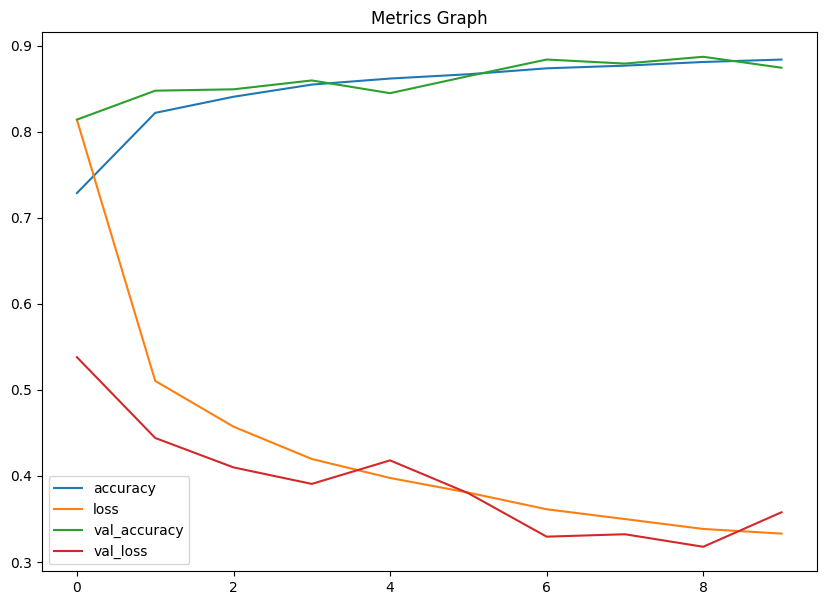

In [12]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [13]:
model.evaluate(test_x, test_y)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8748 - loss: 0.3638


[0.35772764682769775, 0.8743000030517578]

In [14]:
predictions = model.predict(test_x)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [15]:
predictions = tf.argmax(predictions, axis=1)
y_test = tf.argmax(test_y, axis=1)
y_test = tf.Variable(y_test)

print(metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))




0.8743
              precision    recall  f1-score   support

           0       0.68      0.92      0.78      1000
           1       1.00      0.96      0.98      1000
           2       0.92      0.77      0.84      1000
           3       0.92      0.83      0.87      1000
           4       0.84      0.81      0.83      1000
           5       0.89      0.99      0.94      1000
           6       0.67      0.67      0.67      1000
           7       0.97      0.87      0.92      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000



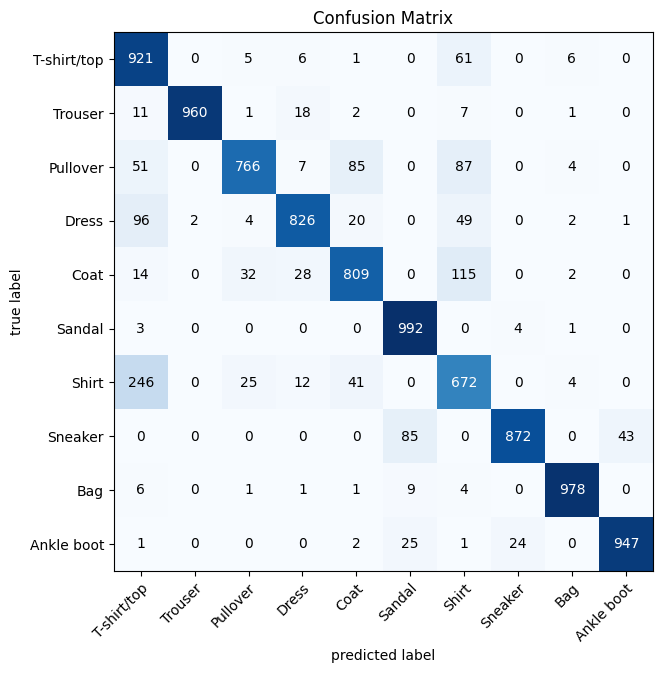

In [16]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, figsize=(10,7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


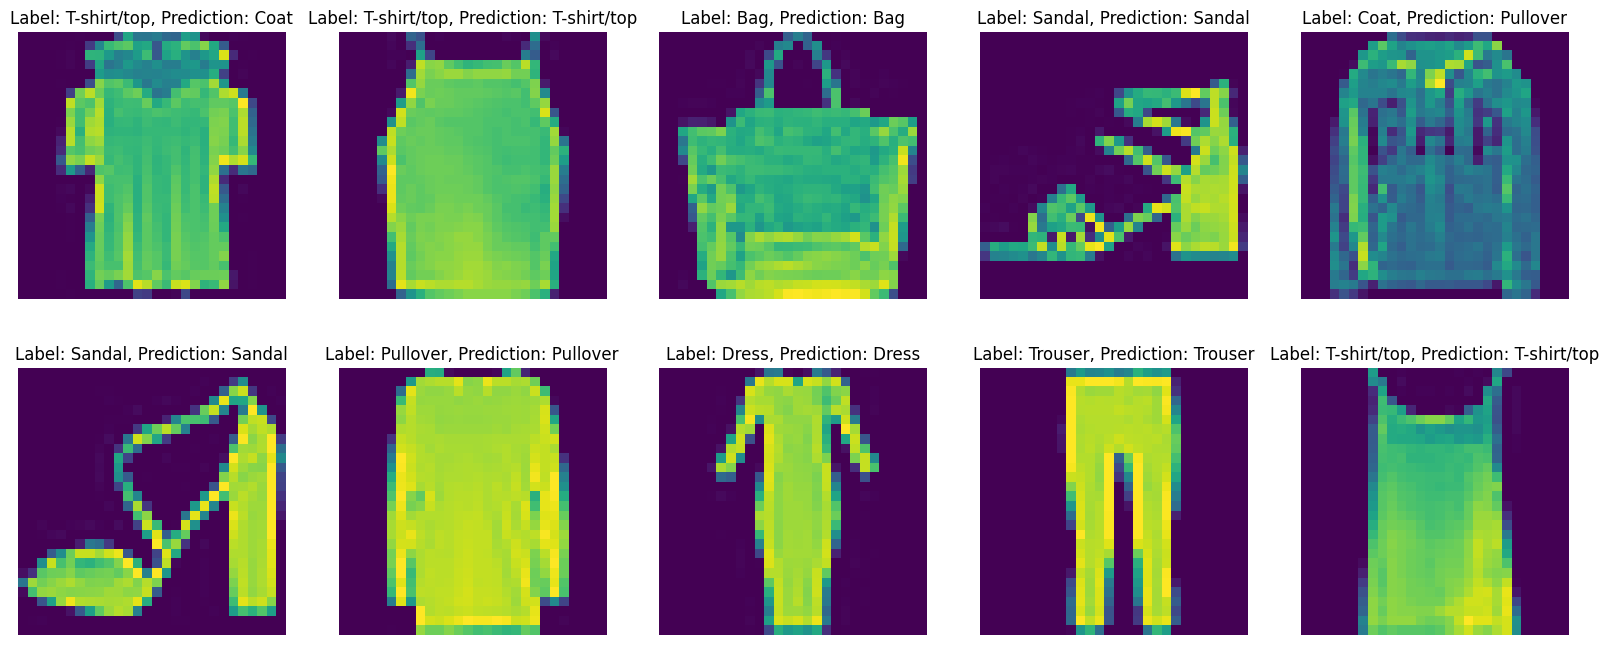

In [17]:

images = []
labels = []
random_indices = random.sample(range(len(test_x)), 10)
for idx in random_indices:
    images.append(test_x[idx])
    labels.append(test_y[idx])
images = np.array(images)
labels = np.array(labels)

fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1
for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    prediction = model.predict(tf.expand_dims(image, axis=0))
    prediction = class_names[tf.argmax(prediction.flatten())]
    label = class_names[tf.argmax(label)]
    plt.title(f"Label: {label}, Prediction: {prediction}")
    plt.imshow(image/255.)
    plt.axis("off")
    x += 1

In [18]:
from sklearn.metrics import classification_report
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred,axis=1)
test_y = np.argmax(test_y,axis=1)
print(classification_report(test_y,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.68      0.92      0.78      1000
           1       1.00      0.96      0.98      1000
           2       0.92      0.77      0.84      1000
           3       0.92      0.83      0.87      1000
           4       0.84      0.81      0.83      1000
           5       0.89      0.99      0.94      1000
           6       0.67      0.67      0.67      1000
           7       0.97      0.87      0.92      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000

